In [1]:
import numpy as np
import matplotlib
import pylab as plt

import sys
sys.path.append('../')

import hallgerd
from hallgerd.core import Sequential, cross_entropy_delta
from hallgerd.layers import Dense

In [2]:
import sklearn
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

In [3]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=8,
                           n_classes=2)
y = y[:,np.newaxis]
X = StandardScaler().fit_transform(X)
y = y.T
X = X.T

In [4]:
X.shape, y.shape

((10, 1000), (1, 1000))

In [5]:
model = Sequential(lr=1e-3, batch_size=256, epochs=60, loss='mse')
model.add(Dense(10, 10, activation='sigmoid'))
model.add(Dense(10, 1, activation='sigmoid'))
model.fit(X, y)

100%|██████████| 60/60 [00:01<00:00, 37.98it/s]


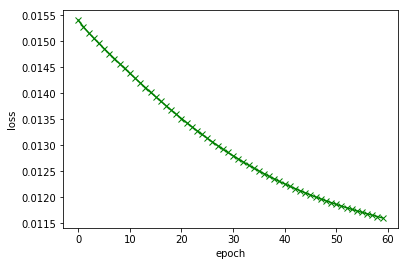

In [6]:
plt.plot(model.history['loss'], 'gx-')
plt.xlabel('epoch'); plt.ylabel('loss')
plt.show()

In [7]:
ypp = model(X)[0]
yp = np.zeros(X.shape[1])
for i in range(X.shape[1]):
    yp[i] = 1 if ypp[i] >= 0.5 else 0

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y.T, yp))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       498
           1       0.82      0.84      0.83       502

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000

